# Tutorial on Fuzzy Logic - 2025

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2025: 
    - Arthur Babey (<a href="mailto:arthur.babey@heig-vd.ch">arthur.babey@heig-vd.ch</a>)

Authors: Gary Marigliano, Shabnam Ataee based on the work of Hector Satizabal.



## Section A. Introduction

The goal of this section is to explain all different parts of a fuzzy model, also called a **_Fuzzy Inference System (FIS)_**. 

This section is written based on this [tutorial](https://ch.mathworks.com/help/fuzzy/fuzzy-inference-process.html).
Even though the vocabulary is not the same, the main idea is the same and we strongly recommend you to read it.

### A.1. How to build a **_Fuzzy model_**?

The following _steps_ are necessary to build a _Fuzzy model_:

* _Step 1._ Transform problem/dataset's variables into fuzzy variables, also called **_linguistic variables_**.

  * A _linguistic variable_ is composed of a **_name_** (e.g. "Temperature") and a set of **_linguistic values_** (e.g. "cold", "warm", "hot") _(see Figure 1)_.
   
  * A _linguistic value_ is composed of a **_name_** (e.g. "warm") and a **_membership function_** _(see Figure 2)_.
  
  
* _Step 2._ Use one or more linguistic variables to create a set of **_fuzzy rules_**.

  * A _fuzzy rule_ is something expressed like _IF "Temperature" is "cold" AND "Sunshine" is "sunny" THEN "Tourists" are "HIGH"_. Indeed, a fuzzy rule is composed of one or more **_antecedents_** (the part(s) before the THEN), one or more **_consequents_** (the part(s) after the THEN), and a **_fuzzy operator_** such as AND or OR operators. The role of the _fuzzy operator_ is to combine antecedents to activate/trigger consequents.
  
  * An _antecendent_ is composed of a linguistic variable and its linguistic value (e.g. "cold" from linguistic variable "Temperature"). An antecendent can be set to NOT e.g. "Temperature" is NOT "cold". 
  
  * A consequent is like an antecedent but, in general it doesn't make sense to apply NOT on it.
  
  * In general, **_fuzzy rules_** may be partially true (triggered) contrary to Boolean rules
    
    
* _Step 3._ Use one or more fuzzy rules to create a **_Fuzzy Iinference System (FIS)_** _(see Figure 3)_.

  * A FIS has a **_type_** depending on how the consequents are represented. The three main types are:
  
    - **_Mamdani_**: In this type, both antecedents and consequents use fuzzy sets.
    
    - **_TSK_**: In this type, consequents are (usually linear) functions depending on the input variables.
    
        - _Advantage:_ Its numeric accuracy may be better than that of a Mamdani FIS. 
        - _Disadvantage:_ it is less, or more hardly, interpretable.
    
    - **_Singleton_**: In this type, consequents are constant values (i.e. fuzzy sets that concentrate its membership values into a single point).
    
        - _Advantage:_ Fast to compute, it is an accuracy trade-off between Mamdani and TSK. More interpretable than TSK FIS
        - _Disadvantage:_ Less interpretable than Mamdani FIS
    
  * A FIS can have a **_default rule_** i.e. a fuzzy rule that has no antecedent (e.g. _ELSE Tourists is LOW_) which ensure that at least one fuzzy rule is active for any given input. The _default rule_ is a fuzzy one, meaning that its activity is also a continuous value.
  

<h5 align="center">Figure 1</h5> 
<img src="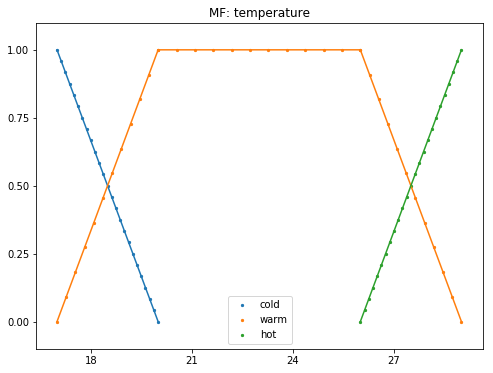
">

<h5 align="center">Figure 2</h5> 
<img src="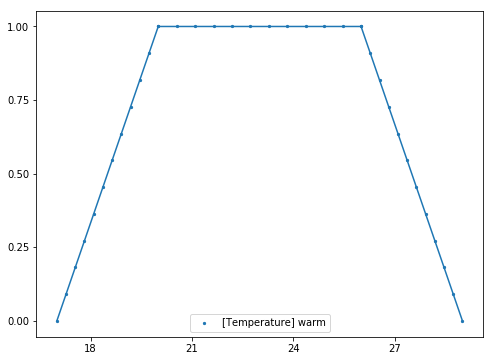
">

<h5 align="center">Figure 3</h5> 
<img src="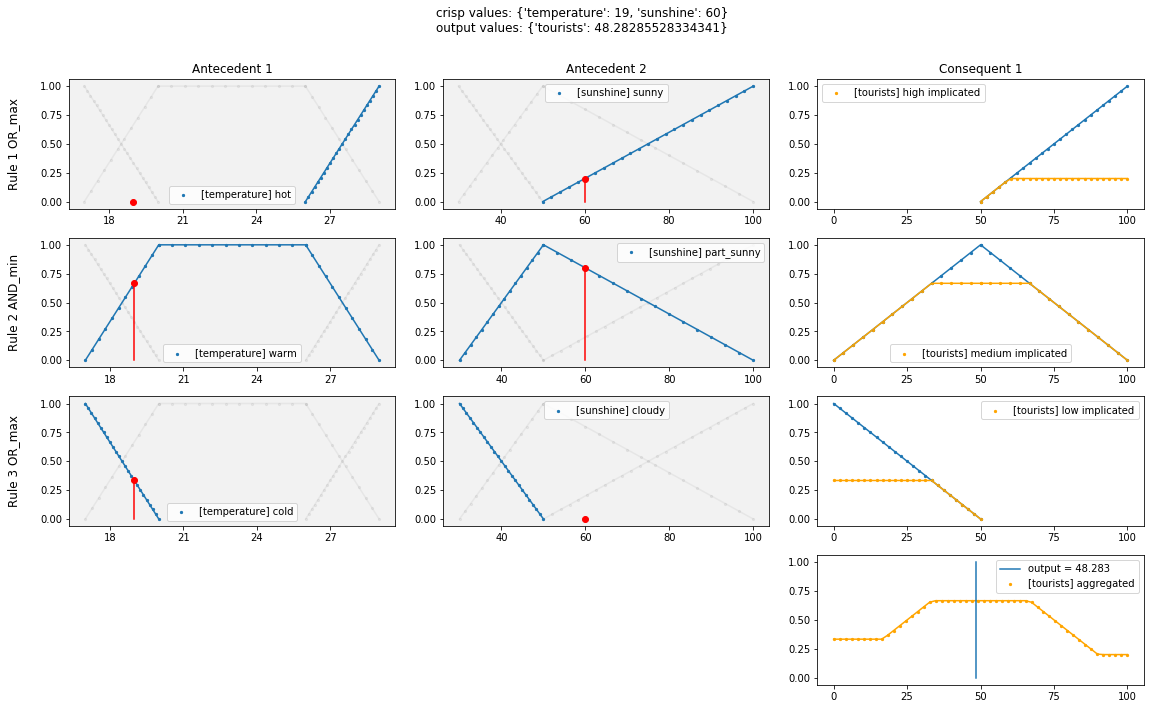
">

### A.2. How to run a **_FIS_**?

The _fuzzy inference process_ is the _**execution**_ that produces a prediction/result as an output for some given inputs. For example, in the Tourist problem seen in class, we give the Temperature and the Sunshine as input variables and the FIS will give us the expected Tourists as the output.

A fuzzy inference process is composed of the following steps:

* _Step 1. **Fuzzification**_
    * Given a **crisp input value** (e.g. Temperature = 19°C), the fuzzification returns a fuzzy value (a number between 0 and 1) i.e. $\mu_{warm}(19) = 0.67$ or $\mu_{partSunny}(60) = 0.8$. _(see Figure 4)_
    
    
* _Step 2. **Implication (Rule Activation)**_

    * For each fuzzy rule compute its activation. This happens in two sub-steps (let's imagine the rule _If "Temperature" is "warm" AND "Sunshine" is "partSunny" THEN "Tourists" is "medium")_
    
        2.1. **Activate** the antecedents i.e. apply the fuzzy operators between antecedents. In our example, let's assume that AND is the fuzzy operator min(): $\mu_{rule2} = min(\mu_{warm}(19), \mu_{partSunny}(60)) = min(0.67, 0.8) = 0.67$ So, the antecedent activation for this rule is 0.67. 
        
        2.2. Apply the rule activation to the consequents. This sub-step is called **implication**. The implication is done by applying a function between the consequent(s) and the activation value i.e. $consequent_{implicated} = f(\mu_{rule2}, consequent)$. In general the implication function $f$ is the min() function. See Figure 3, rule 2 as an example. Graphically, it's seen as a truncation of the consequent's membership function.
        
   * So, as an output of the Implication step you have either "truncated" (due to the last min() function membership functions (the orange ones in Figure 3) in the case of a Mamdani FIS or you have "truncated" single values in the case of a Singleton FIS.
   
   
* _Step 3. **Aggregation**_

    * The aggregation is the part where we merge the activated rules i.e. all implicated consequents to produce a new membership function (in Figure 3, row 4, column 3). Generally, we use the max() function as the aggregation function e.g. $max(implConsRule1,implConsRule2, implConsRule3)$ where $implConsX$ is the implicated consequent of the rule X. 
        
    * So, as an output of the Aggregation step you have a new membership function (one per consequent) that is built using each rule's activation as we can see in Figure 3, row 4, column 3
    
    
* _Step 4. **Defuzzification**_

    * The goal of this step to convert the aggregated fuzzy set(s) into crisp value(s). To do so we apply a defuzzification function, generally COA (Center of Area) or MOM (Mean of Maxima). Implementation details in section 1.2.3.3 of Carlos Pena's thesis.

<h5 align="center">Figure 4</h5>
<img src="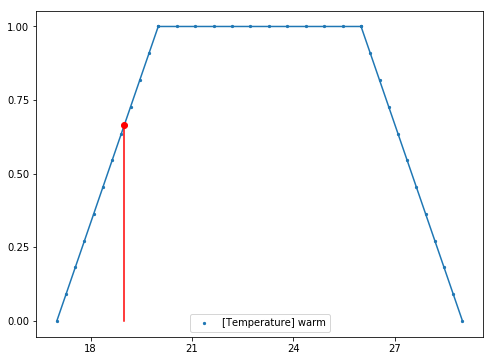
">

## Section B. Installing a virtual environment

In order to build a FIS system in python, you need to install the required libraries. To achieve this goal, create a virtual environment with Python 3.8, activate it and then install the requirement libraries in this virtual environment using the follwoing command:

_pip install -r requirements.txt_

**Note.** You need to run this command from the folder where the 'requirement.txt' file is placed.

## Section C. Defining Linguistic Variables in Python

In this section, we create a linguistic variable which represents _**stars**_ that customers give to a product as the reviews (from 0 to 10 stars). This fuzzy variable (or linguistic variable) has 3 labels (or linguistic values) called _**poor**,_ _**average**_ and _**good**._

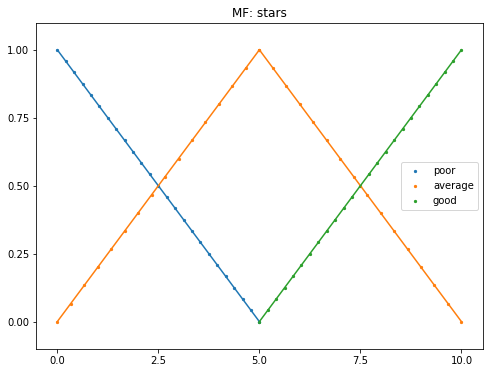

In [1]:
from fuzzy_systems.core.linguistic_variables.linguistic_variable import LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.view.lv_viewer import LinguisticVariableViewer

lv_stars = LinguisticVariable(name="stars", 
                              ling_values_dict={"poor": LinPWMF([0, 1], [5, 0]),
                                                "average": LinPWMF([0, 0], [5, 1], [10, 0]),
                                                "good": LinPWMF([5, 0], [10, 1])})

LinguisticVariableViewer(lv_stars).show()

In the following, it is shown how to create a linguistic variable similar to the above variable by using **TrapMF** (instead of LinPWMF) to create the _**average**_ linguistic label.

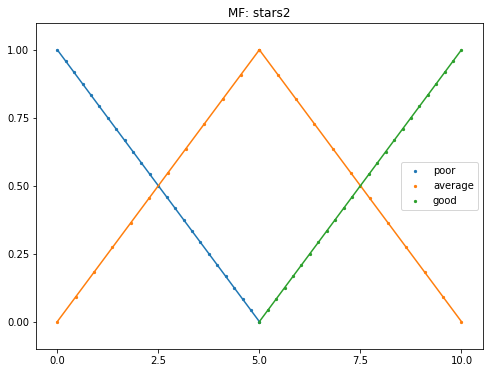

In [2]:
from fuzzy_systems.core.linguistic_variables.linguistic_variable import LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.core.membership_functions.trap_mf import TrapMF
from fuzzy_systems.view.lv_viewer import LinguisticVariableViewer

lv_stars2 = LinguisticVariable(name="stars2", 
                                       ling_values_dict={"poor": LinPWMF([0, 1], [5, 0]),
                                                         "average": TrapMF(0, 5, 10),
                                                         "good": LinPWMF([5, 0], [10, 1])})

LinguisticVariableViewer(lv_stars2).show()

In the following, it is shown how to use horizontally stacked subplots to show these two plots in the same line.

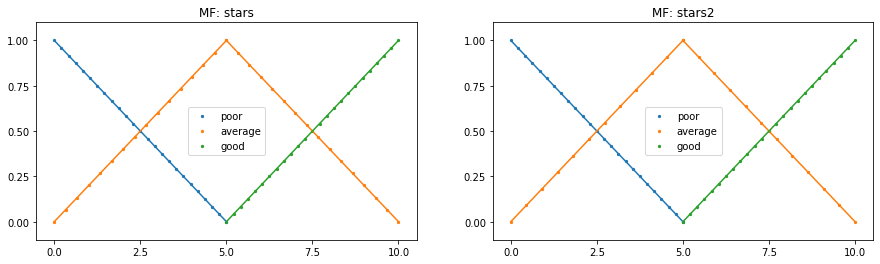

In [3]:
import matplotlib.pyplot as plt

lv_stars = LinguisticVariable(name="stars", 
                              ling_values_dict={"poor": LinPWMF([0, 1], [5, 0]),
                                                "average": LinPWMF([0, 0], [5, 1], [10, 0]),
                                                "good": LinPWMF([5, 0], [10, 1])})

lv_stars2 = LinguisticVariable(name="stars2", 
                                       ling_values_dict={"poor": LinPWMF([0, 1], [5, 0]),
                                                         "average": TrapMF(0, 5, 10),
                                                         "good": LinPWMF([5, 0], [10, 1])})


#Configure the visualization
fig = plt.figure(figsize=(15, 4))
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

LinguisticVariableViewer(lv_stars, axes1)
LinguisticVariableViewer(lv_stars2, axes2)

plt.show()

## Section D. Building and Running a FIS System in Python

In this section, we show you how to create and run a FIS system in python for _Tip Problem_.

### Tip Problem.

In this problem, you want to determine the money (in dollars) you give as a tip to a retaurant after your order. 
In this problem, there are two input variables called _**food quality**_ and _**service quality**_. These two variables are in range [0, 10] and divided into 3 categories _poor, average_ and _high_. The output variable is called _**tip**_ which is in range [0, 25] and divided into 3 categories _low, medium_ and _high_.

### D.1. Defining Linguistic Variables

First, we define linguistic variables for two input variables _(food quality and service quality)_ and the output variable _(tip)_.

In [4]:
# Define linguistic variables

lv_food = LinguisticVariable(name="food_quality", ling_values_dict={
    "poor": LinPWMF([0, 1], [5, 0]),
    "average": LinPWMF([0, 0], [5, 1], [10, 0]),
    "good": LinPWMF([5, 0], [10, 1])
})

lv_service = LinguisticVariable(name="service_quality", ling_values_dict={
    "poor": LinPWMF([0, 1], [5, 0]),
    "average": LinPWMF([0, 0], [5, 1], [10, 0]),
    "good": LinPWMF([5, 0], [10, 1])
})

lv_tip = LinguisticVariable(name="tip", ling_values_dict={
    "low": LinPWMF([0, 1], [13, 0]),
    "medium": LinPWMF([0, 0], [13, 1], [25, 0]),
    "high": LinPWMF([13, 0], [25, 1])
})

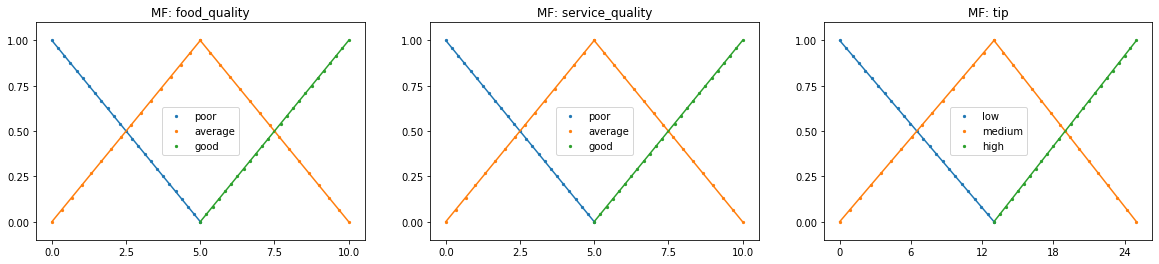

In [5]:
# Visualize the created linguistic variables

fig = plt.figure(figsize=(20, 4))
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

LinguisticVariableViewer(lv_food, axes1)
LinguisticVariableViewer(lv_service, axes2)
LinguisticVariableViewer(lv_tip, axes3)


plt.show()

### D.2. Creating Fuzzy Rules

In this section, we create three fuzzy rules using linguistic variables.

In [6]:
from fuzzy_systems.core.rules.fuzzy_rule import FuzzyRule, Antecedent, Consequent
from fuzzy_systems.core.fis.fis import FIS, OR_max, AND_min, MIN, COA_func

# Create fuzzy rules

r1 = FuzzyRule(
    ants=[
        Antecedent(lv_food, "poor"),
        Antecedent(lv_service, "poor")
    ],
    # This is the antecedent activation function. In this library, a single rule can only be "chained" using one fuzzy operator.
    # So this is correct: v1 is LOW AND v2 is LOW AND v3 is HIGH
    # But this is not correct: v1 is LOW AND v2 is LOW OR v3 is HIGH
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tip, "low"),
    ],
    # implication function or "how the activated antecedents value will be combined with the consequent(s)
    impl_func=MIN
)

r2 = FuzzyRule(
    ants=[
        Antecedent(lv_service, "average"),
    ],
    # note: for this rule we still use OR_max fuzzy operator but we can use another one like AND_min
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tip, "medium"),
    ],
    impl_func=MIN
)

r3 = FuzzyRule(
    ants=[
        Antecedent(lv_service, "good"),
        Antecedent(lv_food, "good")
    ],
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tip, "high"),
    ],
    impl_func=MIN
)

### D.3. Building a FIS system using the created Fuzzy Rules

In this section, we build a FIS system using the created fuzzy rules.

In [7]:
# Create the FIS system

import numpy as np

fis = FIS(
    rules=[r1, r2, r3],
    aggr_func=np.max, # aggregation function or "how the implicated consequent(s) will be combined together"
    defuzz_func=COA_func # defuzzification or "how the "final" membership function created after the aggregation step will be interpreted as a output crisp value
)

### D.4. Running the built FIS system on Crisp Input Values

In this section, we run the built FIS system on crips input values (**food_quality=4.5** & **service_quality=3**)

In [8]:
# Execute the created FIS system on crisp input values

input_values = {'food_quality': 4.5, 'service_quality': 3}
predicted_value = fis.predict(input_values)
print("predicted_value", predicted_value)

predicted_value {'tip': 11.542353595409892}


### D.5. Viewing the Results

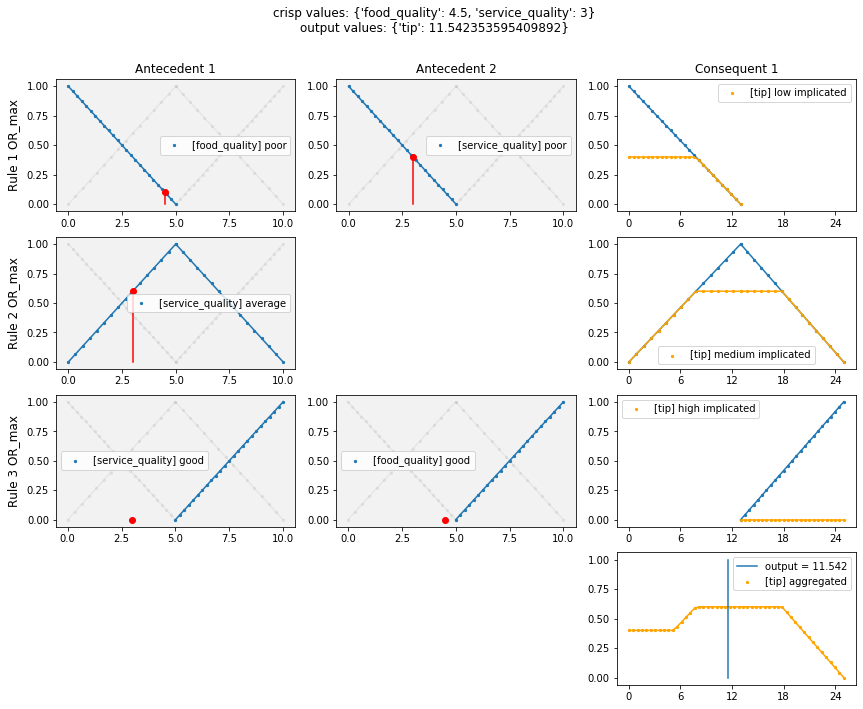

In [9]:
# View the FIS system

from fuzzy_systems.view.fis_viewer import FISViewer

fisv = FISViewer(fis, figsize=(12, 10))
fisv.show()